In [61]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn import svm 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # For creating plots

sns.set(style = 'white')

telecom_cust = pd.read_csv("Telco-Customer-Churn.csv")

telecom_cust.head()
telecom_cust.shape

(7043, 21)

## Cleanup

In [62]:
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
telecom_cust.dropna(inplace = True)
telecom_cust.drop(columns='customerID', inplace=True)
telecom_cust.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [63]:
telecom_cust['Churn'].replace(to_replace='Yes', value=1, inplace=True)
telecom_cust['Churn'].replace(to_replace='No',  value=0, inplace=True)

telecom_cust = pd.get_dummies(telecom_cust)

telecom_cust.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

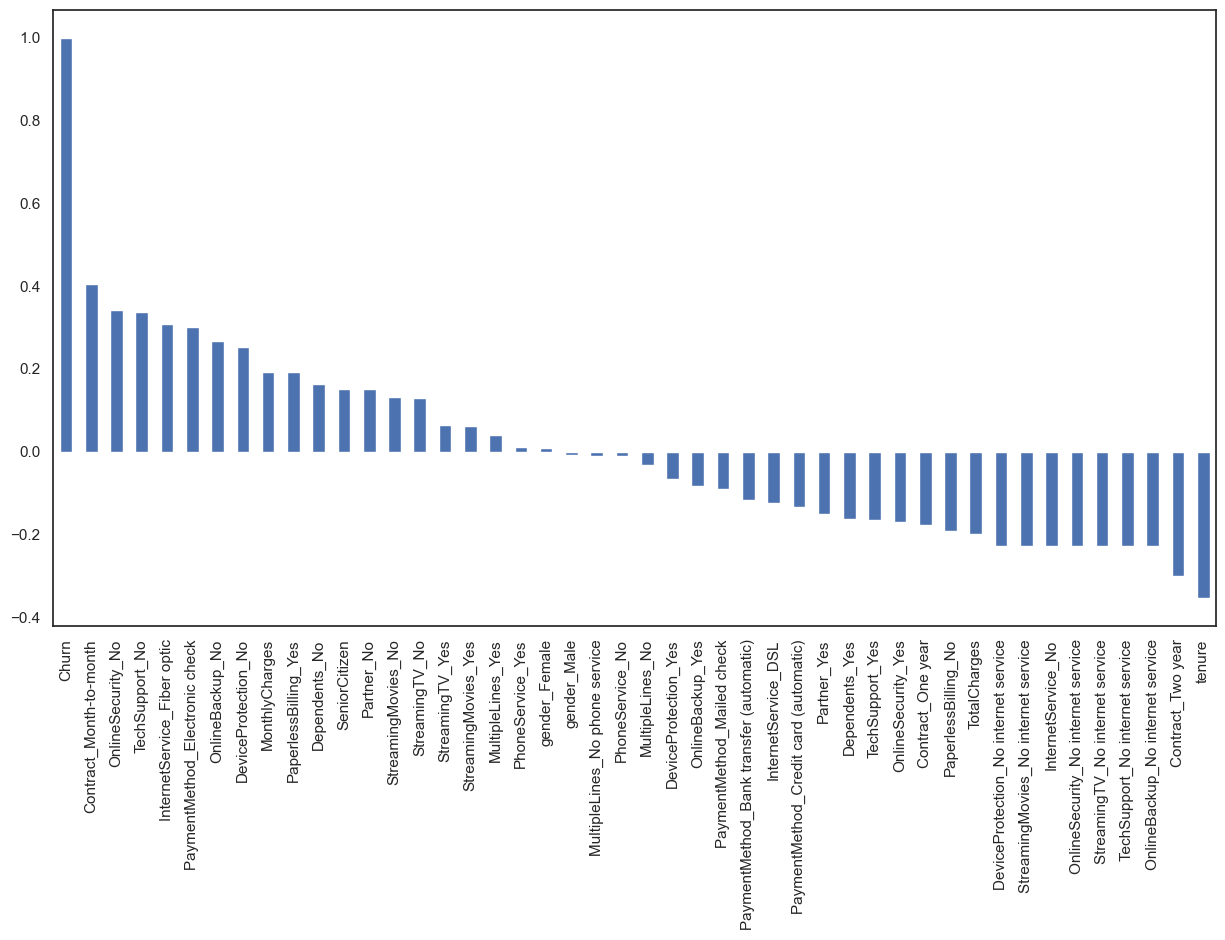

In [64]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
telecom_cust.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

## Machine Learning - Predicting Churn

In [65]:
# Split data into input and output
y = telecom_cust['Churn'].values
X = telecom_cust.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [66]:
# Split Data into Train & Test Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101, stratify=y)


### Logistic Regression

In [67]:
# Create logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)


In [68]:
# Print the prediction accuracy
from sklearn import metrics
predictions_test = result.predict(X_test)
print(metrics.accuracy_score(y_test, predictions_test))

0.8083048919226393


c:\Users\Louviers\anaconda3\envs\pAnDaS\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


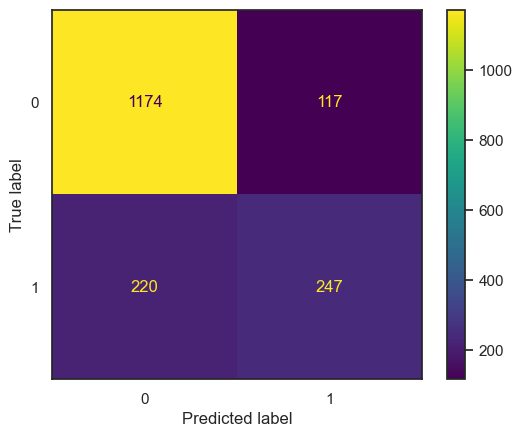

In [69]:
# Show confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)

# Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1050, max_leaf_nodes=250)
model.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=250, n_estimators=1050)

0.8083048919226393


c:\Users\Louviers\anaconda3\envs\pAnDaS\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


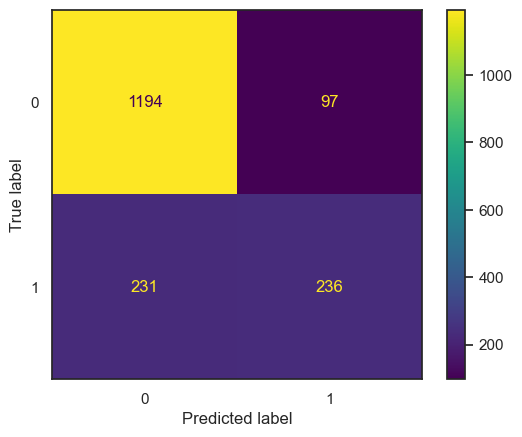

In [71]:
# Show confusion matrix
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay
print(metrics.accuracy_score(y_test, predictions_test))
plot_confusion_matrix(model, X_test, y_test)

In [72]:
from sklearn.gaussian_process import GaussianProcessClassifier

model = GaussianProcessClassifier()

model.fit(X_train, y_train)

GaussianProcessClassifier()

In [73]:
predictions_test = model.predict(X_test)

print(metrics.accuracy_score(y_test, predictions_test))

0.7997724687144482


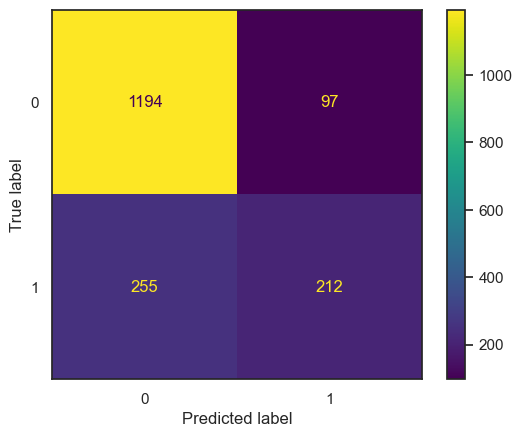

In [74]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions_test)

In [75]:
predictions_train = model.predict(X_train)
print(metrics.accuracy_score(y_train, predictions_train) )

0.8716344330678801
